### Random Forest Classification  

We want to simulate a similar example to the one described in the "Toy Example" below and visualize the RF decision boundaries. Assumption is that RF boundaries look differently.

<img src="data/example1.png" align="left" style="width: 600px;"/>

<img src="data/example2.png" align="left" style="width: 600px;"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

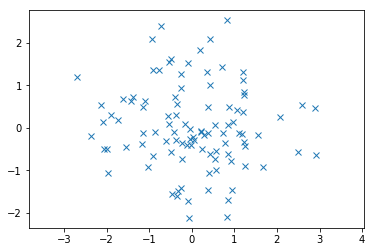

In [2]:
#How to simulate multivariate random points 
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [3]:
#Simulate centers and put them in dataframe
X1 = X2 = []
cov = [[1, 0], [0, 1]]


def define_points(mean): 
    """ mean define as [x,y] list"""
    global X1
    global X2
    mean = mean

    x, y = np.random.multivariate_normal(mean, cov, 100).T
    X1 = X1 + list(x)
    X2 = X2 + list(y)
    

for mean in [[0,0],[10,3],[6,7],[0,20],[12,9],[12,15]]: 
    define_points(mean)

In [4]:
X = pd.DataFrame({'x1': X1, 'x2': X2})
y = 100*[0]+100*[1]+100*[2]+100*[3]+100*[4]+100*[5]
X.head()

,x1,x2
0,-0.015180,-1.088102
1,-0.627045,0.002668
2,-0.632862,-1.703571
3,-0.806314,-0.200134
4,0.440943,-1.066687


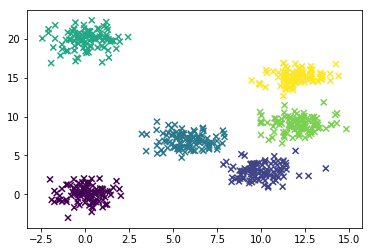

In [5]:
plt.scatter(X.x1, X.x2, marker='x', c=y)

Adapted from [Anisotropics nice notebook hosted on Kaggle](https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly).

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clfs = [('RF: max_depth=2', RandomForestClassifier(n_estimators = 100, max_depth=2)),
           ('RF: max_depth=4', RandomForestClassifier(n_estimators = 100, max_depth=4)),
           ('RF: max_depth=6', RandomForestClassifier(n_estimators = 100, max_depth=6))]

x_min, x_max = (-4,16)
y_min, y_max = (-4,25)
h = 0.02

/home/lukasb23/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


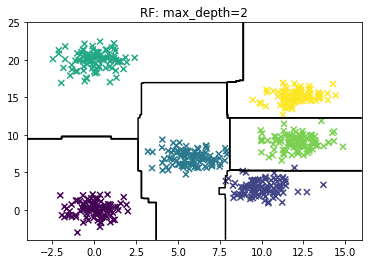

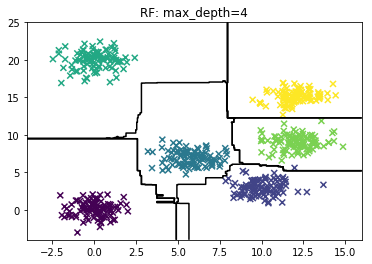

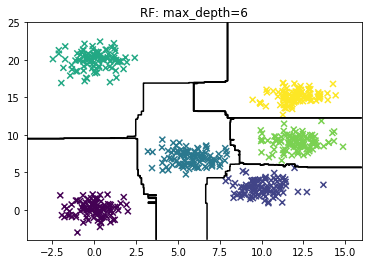

In [7]:
#define a np.meshgrid and plot 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

for title,clf in rf_clfs: 
    
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure()
    plt.scatter(X.x1, X.x2, marker='x', c=y)
    plt.contour(xx, yy, Z, colors='black')
    plt.title(title)

The assumption that the RF boundaries follow the boundaries illustrated in the "Toy Example" is rejected... ;-)

### Random Forest Regression 

Example adapted from [Sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py).

In [16]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydot
from IPython.display import Image
 
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 1000)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

#Train clf
tree_clf = DecisionTreeRegressor(max_depth=3)
tree_clf.fit(X,y)
y_00 = tree_clf.predict(X)

#graph
export_graphviz(
    tree_clf,
    out_file = "output/regression_tree.dot",
    feature_names = ["X"],
    filled=True)

(graph,) = pydot.graph_from_dot_file('output/regression_tree.dot')
png = 'output/regression_tree.png'
graph.write_png(png) 

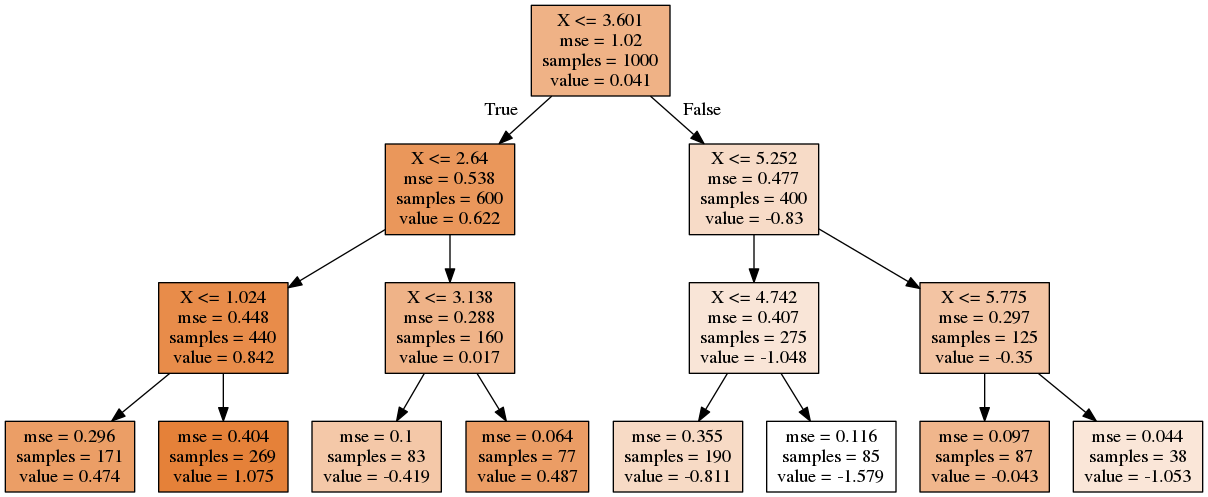

In [17]:
Image("output/regression_tree.png")

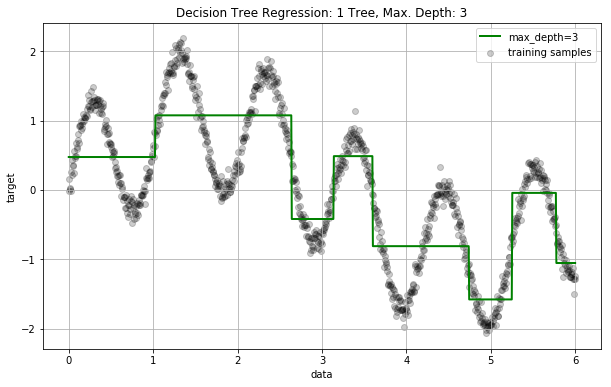

In [18]:
# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, c="k", label="training samples", alpha=0.2)
plt.plot(X, y_00, c="g", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression: 1 Tree, Max. Depth: 3")
plt.legend()
plt.grid()
plt.show()

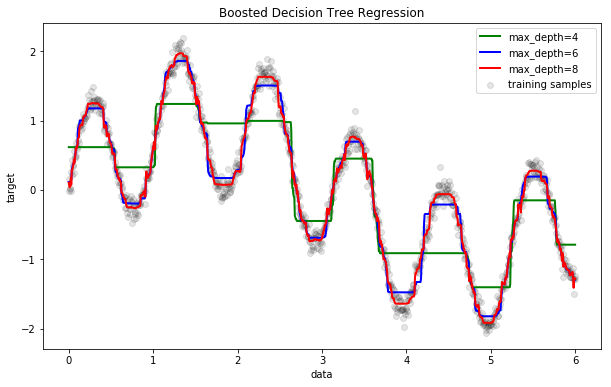

In [19]:
# Adapted from Author: Noel Dawe <noel.dawe@gmail.com>
# 
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Fit regression model
regr_1 = RandomForestRegressor(n_estimators = 50, max_depth=3)
regr_2 = RandomForestRegressor(n_estimators = 50, max_depth=6)
regr_3 = RandomForestRegressor(n_estimators = 50, max_depth=8)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, c="k", label="training samples", alpha=0.1)
plt.plot(X, y_1, c="g", label="max_depth=4", linewidth=2)
plt.plot(X, y_2, c="b", label="max_depth=6", linewidth=2)
plt.plot(X, y_3, c="r", label="max_depth=8", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()